In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from youtube_transcript_api import YouTubeTranscriptApi
import os
import json

### Read data

In [2]:
# Find data folder
path = os.getcwd()
print("Current Directory", path)
src_folder = os.path.abspath(os.path.join(path, os.pardir))
project_folder = os.path.abspath(os.path.join(src_folder, os.pardir))
outside_folder = os.path.abspath(os.path.join(project_folder, os.pardir))
data_folder = outside_folder + '/sb-mirror'

Current Directory /Users/jinlingxing/Projects/Kaggle/video_sponsorship_detection/src/exploration


In [3]:
# Use glob to get all the csv files in the folder
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))
csv_files

['/Users/jinlingxing/Projects/Kaggle/sb-mirror/categoryVotes.csv',
 '/Users/jinlingxing/Projects/Kaggle/sb-mirror/warnings.csv',
 '/Users/jinlingxing/Projects/Kaggle/sb-mirror/unlistedVideos.csv',
 '/Users/jinlingxing/Projects/Kaggle/sb-mirror/userNames.csv',
 '/Users/jinlingxing/Projects/Kaggle/sb-mirror/videoInfo.csv',
 '/Users/jinlingxing/Projects/Kaggle/sb-mirror/lockCategories.csv',
 '/Users/jinlingxing/Projects/Kaggle/sb-mirror/ratings.csv',
 '/Users/jinlingxing/Projects/Kaggle/sb-mirror/vipUsers.csv',
 '/Users/jinlingxing/Projects/Kaggle/sb-mirror/sponsorTimes.csv']

Read csv files 

In [4]:
file_mapper = list(map(lambda file: pd.read_csv(file), csv_files))

/var/folders/fp/yp6r1v111bq6mwlsn5kkcsb80000gn/T/ipykernel_84172/1798885256.py:1: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  file_mapper = list(map(lambda file: pd.read_csv(file), csv_files))


In [5]:
file_names = [file.rsplit('/')[-1] for file in csv_files]
df_names = [name.split('.')[0] for name in file_names]
df_names

['categoryVotes',
 'warnings',
 'unlistedVideos',
 'userNames',
 'videoInfo',
 'lockCategories',
 'ratings',
 'vipUsers',
 'sponsorTimes']

In [6]:
df_dict = {name: file for name, file in zip(df_names, file_mapper)}

### Columns of tables

- **categoryVotes: 350499 rows**

    - UUID: universally unique identifier 
    - category: 
       - 'selfpromo', 'interaction', 'music_offtopic', 'intro', 'sponsor',
       - 'outro', 'preview', 'filler', 'moreCategories', 'outror',
       - 'poi_highlight', 'offtopic', 'exclusive_access'
    - vote:
    - id: 

In [7]:
category_votes = df_dict['categoryVotes']
category_votes.head()

,UUID,category,votes,id
0,d8859d7c1ff78d99a1d90aee0b78a603d816f103c99ee5...,selfpromo,500,1
1,0b6c425b23aa5f523cbe8fed3bd9be5169ff926bd371a2...,selfpromo,1500,2
2,e5d1c1f876c9b9c9b0d99bc8b3e360a50609cde2cebaa8...,selfpromo,500,3
3,ad1e0087b93bf2f039abada88811cbd58e38976c13c168...,interaction,500,4
4,a59e62d876b0f5f8021ab003941be41129c0f4fbe462f8...,selfpromo,500,5


Distribution of category and votes

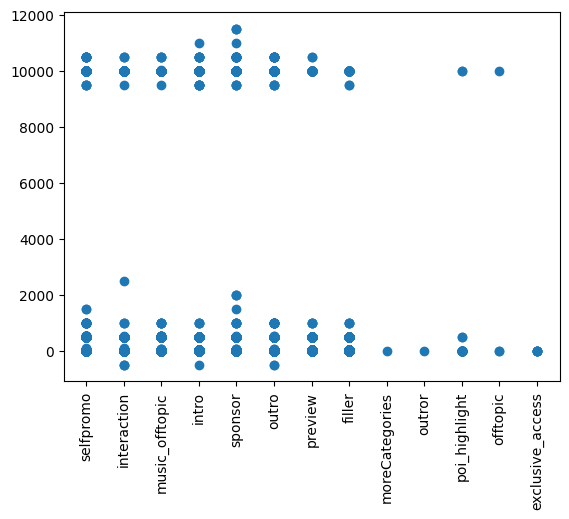

In [8]:
plt.scatter(x=category_votes['category'], 
            y=category_votes['votes'])
plt.xticks(rotation=90)
plt.show()


- **warnings: 1341 rows**

    - userID
    - issueTime 
    - issuerUserID
    - enabled
    - reason

In [9]:
warnings = df_dict['warnings']
warnings.head()

,userID,issueTime,issuerUserID,enabled,reason
0,f285552fa2320f86b7125b089f9802859447afbed514c0...,1611509282008,f285552fa2320f86b7125b089f9802859447afbed514c0...,0,NaN
1,7a09418ae9accb7946c95feb957d9d7066caa56168c2cd...,1612109198435,d3c5d3dc8bb01c565f5bef193e39799a36b90dd3f0d367...,0,NaN
2,0658dcc353c6a1f976e5c7c049b05c140774665f9e8ed1...,1614519332220,f285552fa2320f86b7125b089f9802859447afbed514c0...,1,NaN
3,7fbc10568303c09495f6f145c78d53c015e49dbbd51c60...,1614785634324,b1a5175b47bcde123c7ddfb73b63d36e5db475f64d05f0...,0,NaN
4,a75a3453d655f6f578a466d2dca76513fe3e1dc63f8794...,1614887886974,d3c5d3dc8bb01c565f5bef193e39799a36b90dd3f0d367...,0,NaN


- **unlistedVideos: 121403 rows**

    - videoID
    - year: 0, 2005-2016
    - views
    - channelID
    - timeSubmitted	
    - service: 'Youtube'
    - id

In [10]:
unlisted_videos = df_dict['unlistedVideos']
unlisted_videos.head()

,videoID,year,views,channelID,timeSubmitted,service,id
0,6eZcV1UuUzI,2006,1840916,UCOKENPzhLF5PjWhobSiMQ-g,1624515815663,YouTube,1
1,IN1n27DRxLQ,2012,522958,UCty6D9Ph8JXS3gUPZ4OlGLg,1624520108951,YouTube,2
2,onkLFOKyhXQ,2013,104570,UCT6svdPbag717cINN4yQMiQ,1624520658507,YouTube,3
3,K5sANHYp_IQ,2008,782093,UC0JrECyClcghpJSjUHsDCqw,1624521325037,YouTube,4
4,32Moj0AQqB8,2014,30637,UCRDXVJIGaGQHzQwptbF98dg,1624525475139,YouTube,5


- **userNames: 193675 rows**

    - userID
    - userName
    - locked

In [11]:
user_names = df_dict['userNames']
user_names.head()

,userID,userName,locked
0,0ccc52f0406df538506ae9bdd436611ee7150c64dea69a...,cd,0
1,950f2c3202ff0835ac683a1e97632d71257eeb5a9cc9c7...,Scuddzero,0
2,c4a6408834ac21d6bd8eca3cee787a1b1c3009ffacb1d4...,Geroyuni,0
3,01c70fbb8cebe46f5ca2b81e0c1fe8d490709d86e2624e...,Anonymous SponsorBlock Users,0
4,d45b223dd02b0c6c0019a3d7aa5675245375095fa42345...,Cool People,0


- **videoInfo: 4371244 rows**

    - videoID
    - channelID
    - title
    - published

In [12]:
video_info = df_dict['videoInfo']
video_info.head()

,videoID,channelID,title,published
0,QyTRvbb3gkk,UCr7tNSNf7_aEEh5P-F5mE4A,Kronii Got Friendzoned by Chat but She End Up ...,1.634429e+09
1,qU1Yv58EXcc,UCo_IB5145EVNcf8hw1Kku7w,Game Theory: Minecraft's DARKEST Timeline! (He...,1.634429e+09
2,yKkVHBh9DQk,UCXJkLU1wZVqZjjVe1MuRj-A,TRIPLE RECORD EN GLOBILLOS? 🎈,1.633565e+09
3,7wCZSBOX7eM,UCg83RGdRpwfvoFEuE2zWKZA,Johnny vs. Nickelodeon All-Star Brawl (Sponsored),1.633392e+09
4,VVGjjaWWeRA,UCKBYXp4Xn2I2tL1UL4fpbhw,WOTB | NEW BIG HITTING JAGTIGER PREMIUM!,1.634429e+09


- **lockCategories: 4371244 rows**

    - videoID
    - userID
    - actionType
    - category
    - hashedVideoID
    - reason
    - service
    - id

In [13]:
lock_categories = df_dict['lockCategories']
lock_categories.head()

,videoID,userID,actionType,category,hashedVideoID,reason,service,id
0,PkQcl9r1VqE,7a7e6f513cd2a7a9abfd5c3dec7c8e2ea0e5e26f2683a8...,skip,sponsor,124c98b6f0f07890fea471c6c66628512c6583820f27f1...,Big eye rons is a joke,YouTube,1
1,p5GAJOSEGPQ,b5291a34aacfc156448faa33a0d6e3679d71ac7b2386e2...,skip,intro,ef52c0b506181da4a67d9674ad71a197c0d434267df7f1...,NaN,YouTube,2
2,p5GAJOSEGPQ,b5291a34aacfc156448faa33a0d6e3679d71ac7b2386e2...,skip,sponsor,ef52c0b506181da4a67d9674ad71a197c0d434267df7f1...,NaN,YouTube,3
3,p5GAJOSEGPQ,b5291a34aacfc156448faa33a0d6e3679d71ac7b2386e2...,skip,outro,ef52c0b506181da4a67d9674ad71a197c0d434267df7f1...,NaN,YouTube,4
4,_YgZjhBD31Q,9897d3bc649a61a92e2cb47ba985d0bca90c9941ad8b24...,skip,sponsor,8ea9316b010355424007dd9cd912a4fe0cd39fef03b1dc...,NaN,YouTube,5


- **lockCategories: 9848 rows**

    - videoID
    - service
    - type
    - count
    - hashedVideoID
    - id

In [14]:
ratings = df_dict['ratings']
ratings.head()

,videoID,service,type,count,hashedVideoID,id
0,S_7lIORKPQM,YouTube,1,1,7d10799269f0aa17e5bf2b2073c5e41b8460a5a8baa1aa...,1
1,jNQXAC9IVRw,YouTube,1,1,67454704342df24de2d91fae262fc75b3c9735d45135a6...,2
2,QfFiAwzokSw,YouTube,1,1,00bc6324c98cadee10844db68e3d12f1208097a40e87a8...,3
3,p1mYz1X_CE0,YouTube,1,1,04bd15fded273eab773fb5e5d9cc5e7e014987a1f4c440...,4
4,ETEg-SB01QY,YouTube,1,1,8f9357fe97fed4655a858d95ede40cbd0c4a34b715a37e...,5


- **vipUsers: 103 rows**

    - userID

In [15]:
df_dict['vipUsers'].head()

,userID
0,57ddecc5b36813ddb8ea1eba73342c8a783527b884b6eb...
1,c4a6408834ac21d6bd8eca3cee787a1b1c3009ffacb1d4...
2,d261c35ce21b0554c183fc42e2f92bf30609e0540bad8e...
3,963cdc21439055c825860792fa6ef0a48ffc8823f20f31...
4,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...


- **sponsorTimes: 103 rows**

    - videoID
    - startTime
    - endTime
    - votes
    - locked
    - incorrectVotes
    - UUID
    - userID
    - timeSubmitted
    - views
    - category
    - actionType
    - service
    - videoDuration
    - hidden
    - reputation
    - shadowHidden
    - hashedVideoID
    - userAgent
    - description

In [16]:
sponsor_times = df_dict['sponsorTimes']
sponsor_times.head()

,videoID,startTime,endTime,votes,locked,incorrectVotes,UUID,userID,timeSubmitted,views,category,actionType,service,videoDuration,hidden,reputation,shadowHidden,hashedVideoID,userAgent,description
0,FfgT6zx4k3Q,446.51013,513.39233,225,0,1,96150fa0-a28a-11e9-b210-99c885575bb9,38e7c2af-09f4-4492-bf49-75e443962ccd,1564088876715,3221,sponsor,skip,YouTube,0.0,1,0.0,0,0bfebefdc667735b19d5f2630e7e83a5f7fdddb880534e...,NaN,NaN
1,fBxtS9BpVWs,41.00000,53.00000,116,0,1,b2465943-1313-449c-b75c-08b14756ac0a,38e7c2af-09f4-4492-bf49-75e443962ccd,1564088876715,619,sponsor,skip,YouTube,0.0,0,0.0,0,bdd81b2b8192683242fe3608c45d5b958ddc71e9b2981a...,NaN,NaN
2,AM1-ecnQsm4,164.88225,206.00000,-2,0,1,467137b0-af20-11e9-93c3-13d71c2776be,38e7c2af-09f4-4492-bf49-75e443962ccd,1564088876715,133,sponsor,skip,YouTube,0.0,0,0.0,0,e294b5c58ceb6e4fd82919cc3387e60ac2bc9573570e26...,NaN,NaN
3,fBxtS9BpVWs,714.00000,763.00000,64,0,1,7c9619bd-8d91-4b42-a9be-39ffc99dad4a,38e7c2af-09f4-4492-bf49-75e443962ccd,1564088876715,326,sponsor,skip,YouTube,0.0,0,0.0,0,bdd81b2b8192683242fe3608c45d5b958ddc71e9b2981a...,NaN,NaN
4,uqKGREZs6-w,475.52167,532.20874,302,0,1,622f9270-a2a1-11e9-b210-99c885575bb9,38e7c2af-09f4-4492-bf49-75e443962ccd,1564088876715,12420,sponsor,skip,YouTube,0.0,0,0.0,0,70f8d0e75affa202ab510bd86828080af1dddf9218be46...,NaN,NaN


### Export data for sponsor videos

All the unique videos in sponsor category: 9500

In [17]:
sponsor_df = lock_categories[lock_categories['category'] == 'sponsor']

All the videos of the video_info in the sponsor category: 6781. <br/>
All the videos of the video_info **not in** the sponsor category: 4364463. <br/>
Only 0.15% videos are sponsored

If we take 2000 videos to analyze, it contains 3 videos in the sponsors category and 1997 videos not in the sponsor category.  <br/>
Data Sampling is not necessary, because it doesn't have too many sponsored videos.  <br/>
Therefore, we take 1000 sponsored videos and 1000 not sponsored videos. 

In [18]:
# Add a new column: sponsored
video_info['sponsored'] = np.where(video_info['videoID'].isin(sponsor_df['videoID']), True, False)
sample_df = video_info.groupby("sponsored").sample(n=1000, random_state=1)
sample_df

,videoID,channelID,title,published,sponsored
3049328,1ehdJ0LQ0wY,UCaVp-iXRPfiSxbkhmi56IHQ,This DEFINITELY doesn't come around like THIS ...,1.662768e+09,False
1935121,57VMY0LSM8I,UCiWLfSweyRNmLpgEHekhoAg,Why JWill doesn't expect Doc Rivers to be coac...,1.651450e+09,False
3052623,hHztLpqfdT0,NaN,NaN,0.000000e+00,False
1230202,V-_5BC6sLqg,UCvApauGwnYsF5O54ejdivIQ,🛍Collective Fragrance Haul!🛍Fun Finds from Fra...,1.662682e+09,False
83575,1H8-FCDwU4c,UC2qoLqo8RuV4P_88yhHCZIg,"Локдаун затягивается, Шпионы в мусоре, Бум кре...",1.635811e+09,False
...,...,...,...,...,...
2391255,UOvjdeZbT0M,UCs0kMbzhUYV2lhIV7xoWhoA,Review Of The BEST Acting During ED Raids | CR...,1.659744e+09,True
2093018,v9lZ2MEx8oU,NaN,NaN,0.000000e+00,True
2367974,L0A-FIyzt1I,UC0vBXGSyV14uvJ4hECDOl0Q,Why Are Websites Going Down More Often?,1.659398e+09,True
2444680,KbVvETwMJaE,UCz4a7agVFr1TxU-mpAP8hkw,India's GREATEST Achievement | India@75,1.660522e+09,True


In [19]:
video_list = sample_df['videoID'].unique()
video_list

array(['1ehdJ0LQ0wY', '57VMY0LSM8I', 'hHztLpqfdT0', ..., 'L0A-FIyzt1I',
       'KbVvETwMJaE', 'OylGu7Q2sA0'], dtype=object)

In [20]:
transcript_save_path = data_folder + '/transcript'
transcript_save_path

'/Users/jinlingxing/Projects/Kaggle/sb-mirror/transcript'

In [21]:
no_english_transcript = []

In [22]:
def main(input: List[str]) -> None :
    for index, video_id in enumerate(input):
        try:
            
            complete_name = os.path.join(transcript_save_path, f"{video_id}.json")
            transcript = YouTubeTranscriptApi.get_transcript(video_id)
            with open(complete_name, "w") as outfile:
                outfile.write(json.dumps(transcript, indent=4))
        except :
            no_english_transcript.append(video_id)
            continue

    print('Task Completed!')


if __name__ == '__main__':
    main(video_list)

Task Completed!


### Text mining in JSON file

In [23]:
sponsor_df['videoID']

0        PkQcl9r1VqE
2        p5GAJOSEGPQ
4        _YgZjhBD31Q
5        De4jPjoHatA
14       pdj1Dwsw17M
            ...     
99821    3Q6uCrpzbPY
99822    3Q6uCrpzbPY
99838    xtbD0mspjBE
99839    xtbD0mspjBE
99840    xtbD0mspjBE
Name: videoID, Length: 23483, dtype: object

In [24]:
# transcript_path = transcript_save_path + '/' + '1ehdJ0LQ0wY.json'  # Not sponsored example
transcript_path = transcript_save_path + '/' + 'PkQcl9r1VqE.json'  # Sponsored example
transcript_path

'/Users/jinlingxing/Projects/Kaggle/sb-mirror/transcript/PkQcl9r1VqE.json'

#### Labelling data

In [25]:
label_data = {}
for file_name in os.listdir(transcript_save_path):
    if '.json' not in file_name:
        continue
    video_id = file_name.split('.')[0]
    transcript_path = transcript_save_path + '/' + file_name
    with open(transcript_path, 'r') as f:
        data = json.load(f)
        sentences = [data[i]['text'] for i in range(len(data))]
        one_transcript = ' '.join(sentences)
        label_data[video_id] = one_transcript

In [26]:
labelled_df = pd.DataFrame.from_dict(label_data, orient='index', columns=['Transcript']).reset_index().rename(columns={'index': 'videoID'})
labelled_df.head()

,videoID,Transcript
0,GaGphoDeT2w,in the anime Community we make up a lot of wor...
1,JzB7yS9t1YE,[MUSIC PLAYING] LILY PENG: Hi everybody. My na...
2,9g_Q0QPsOtI,[Music] hey guys welcome back to another video...
3,P6aUSrw03bE,this video was sponsored by morningbrew hey ha...
4,RPO57PLwdY0,foreign [Music] welcome to audit the audit whe...


In [27]:
len(labelled_df)

1372

In [28]:
sponsored_df = labelled_df.merge(sample_df, how='left', on='videoID')
sponsored_df

,videoID,Transcript,channelID,title,published,sponsored
0,GaGphoDeT2w,in the anime Community we make up a lot of wor...,UCr8XdVBXUrjEYX3nxobTmIQ,Sasuke is the REAL Hokage?!,0.000000e+00,False
1,JzB7yS9t1YE,[MUSIC PLAYING] LILY PENG: Hi everybody. My na...,UC_x5XG1OV2P6uZZ5FSM9Ttw,Bringing AI and machine learning innovations t...,1.525910e+09,False
2,9g_Q0QPsOtI,[Music] hey guys welcome back to another video...,UCQ2k71p7MJKU9iPpKfSWYOA,Turning My OC into a Desktop Buddy (Shimeji)! ...,0.000000e+00,False
3,P6aUSrw03bE,this video was sponsored by morningbrew hey ha...,UCRG_N2uO405WO4P3Ruef9NA,Phone labels: The EU's best idea yet,1.662077e+09,True
4,RPO57PLwdY0,foreign [Music] welcome to audit the audit whe...,UCc-0YpRpqgA5lPTpSQ5uo-Q,This Cop Doesn't Understand Basic Civilian Rights,0.000000e+00,True
...,...,...,...,...,...,...
1367,yP-lYJm8_bQ,ladies and gentlemen we have lost yet another ...,NaN,NaN,0.000000e+00,True
1368,7B5cMK7gUVY,I do love it when Brands put an effort into th...,UCwwuSBYcErVlOpveYubHv4g,"Goodies from Google! Pixel 7, Pixel 7 Pro, Pix...",0.000000e+00,False
1369,ScHzMnAcn_s,hello everybody today we're going to talk abou...,NaN,NaN,0.000000e+00,True
1370,C9p7WO01yA8,this episode of moist Mater brought to you by ...,UCq6VFHwMzcMXbuKyG7SQYIg,Moist Meter | M3GAN,0.000000e+00,True


In [36]:
sponsor_df_save_path = data_folder + '/sponsor_dataframe.csv'
sponsor_df_save_path

'/Users/jinlingxing/Projects/Kaggle/sb-mirror/sponsor_dataframe.csv'

In [37]:
sponsored_df.to_csv(sponsor_df_save_path)